**Load the required libraries** 

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns 
import warnings

warnings.filterwarnings("ignore")

In [2]:
# Load the required data
appointment_df = pd.read_csv("../data/Appointments List.csv", 
                             encoding='UTF-16', delimiter="\t")

# Explanatory Data Analysis 
## Data Assessment 

In [3]:
# first few rows 
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,Grand Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,Total,"55,975",*
1,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
2,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
3,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
4,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"


In [4]:
# Data info summary 
appointment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55976 entries, 0 to 55975
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Appointment UID           55976 non-null  object
 1   Appt Status Description   55976 non-null  object
 2   Date Of Service           37250 non-null  object
 3   Chartnumber               55975 non-null  object
 4   NurseName                 19321 non-null  object
 5   FirstTreatmentApptInd     54678 non-null  object
 6   Appt Type Group           54678 non-null  object
 7   Appt Type                 54677 non-null  object
 8   Created By                55976 non-null  object
 9   Provider                  55976 non-null  object
 10  Facility City             51738 non-null  object
 11  Room                      55976 non-null  object
 12  Column Heading            54697 non-null  object
 13  #                         55976 non-null  object
 14  Count of tblAppointmen

In [5]:
# Duplicated? 
appointment_df.duplicated().sum()

0

In [6]:
# Who are the nurses?
appointment_df["NurseName"].unique()

array(['Total', nan, 'DANIEL THOMPSON', 'EDWARD ALMEIDA',
       'OLGA PAVLEYEVA', 'DANA COLLEY', 'Daniel Thompson',
       'Kelsey Paydos', 'Katherine Marcinkus', 'Doreen Rynne, RN',
       'Erin Reilly, RN', 'Mona Itani, MD', "Kaitlin O'Donnell",
       'Stephanie Hogan', 'Odessa Holt', 'Melissa Martin', 'Sarah Slote',
       'Sara Glick', 'Holly Randall', 'Jake Keenan', 'Olivia Hendy',
       'Kimberly Dowdie'], dtype=object)

In [7]:
# What types of appointments? 
appointment_df["Appt Status Description"].unique()

array(['Total', 'Made', 'Seen', 'Deleted', 'Cancelled', 'No Show',
       'Other', 'Arrived', 'Moved'], dtype=object)

## Data Wrangling 

In [8]:
# Drop the first row of the data frame
appointment_df.drop(index=0, inplace=True)
appointment_df.reset_index(drop=True, inplace=True)

# Confirm 
appointment_df.head()

,Appointment UID,Appt Status Description,Date Of Service,Chartnumber,NurseName,FirstTreatmentApptInd,Appt Type Group,Appt Type,Created By,Provider,Facility City,Room,Column Heading,#,Count of tblAppointments,Patient FID
0,1,Made,01/01/00,NaN,NaN,N,Default,NaN,system,",",NaN,Other,NaN,1,1,1
1,109,Seen,01/22/18,1,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,2,1,"5,283"
2,239,Seen,01/22/18,2,NaN,N,MH Infusion,KETAMINE MH -INFUSION ONLY,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,2C,3,1,"5,286"
3,240,Made,01/22/18,9,NaN,N,Intake,TMS INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,4,1,"5,351"
4,241,Made,02/02/18,6,NaN,N,Intake,KETAMINE INTAKE DR. BRENNER,EMILY,"BRENNER,DANIEL A",CAMBRIDGE,Other,DR. BRENNER,5,1,"5,348"


In [9]:
# Replace "Made" to "Seen" and "Deleted" to "Cancelled"
appointment_df["Appt Status Description"].replace({
    "Made":"Seen",
    "Deleted": "Cancelled"
}, inplace=True)


appointment_df["Appt Status Description"].unique()

array(['Seen', 'Cancelled', 'No Show', 'Other', 'Arrived', 'Moved'],
      dtype=object)

## Data Visualization

Text(0.5, 1.0, 'Appointment Status')

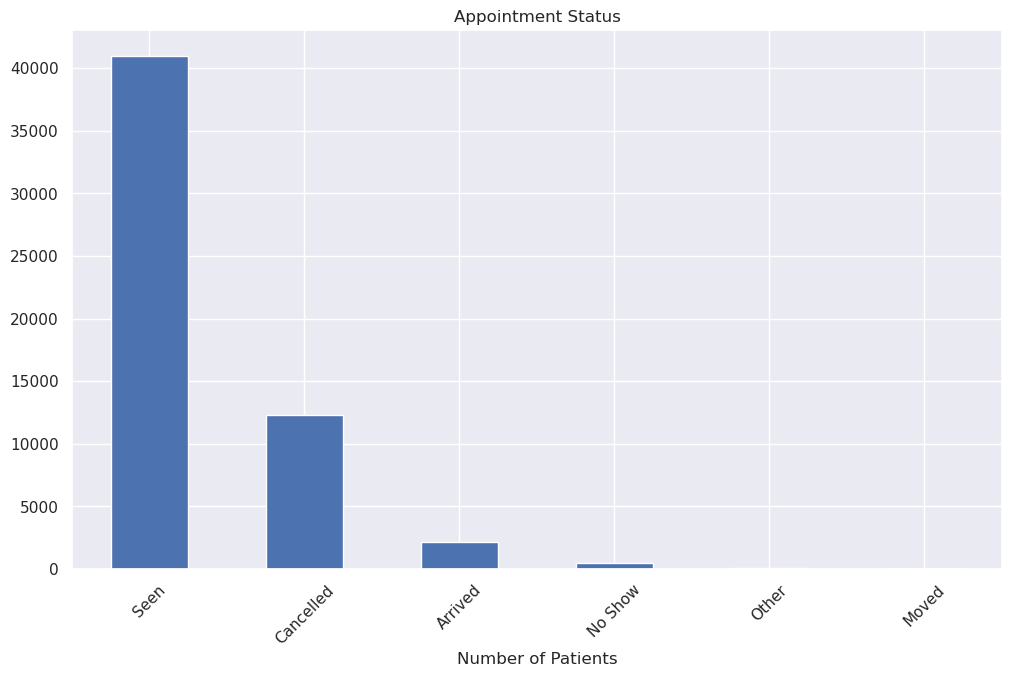

In [10]:
# Compare the appointments with bar chart
%matplotlib inline 
sns.set()

appointment_df["Appt Status Description"].value_counts().plot(
    kind="bar", rot=45, figsize=(12, 7)
)
plt.xlabel("Number of Patients")
plt.title("Appointment Status")

In [11]:
# Get the patients who had a successfull appointment
seen_df = appointment_df[appointment_df["Appt Status Description"]=="Seen"].reset_index(drop=True)

seen_df.shape

(40985, 16)

**Are there 'returning' patients in the appointments?**

In [12]:
uniqueness = seen_df["Patient FID"].nunique()/seen_df.shape[0] * 100

print(f"There is a {round(uniqueness, 2)}% unique patients among all the total appointments")

There is a 4.34% unique patients among all the total appointments


Most the patients have visited the facilities severally, lets find how frequenctly the patients make appointments

Text(0, 0.5, 'Frequency')

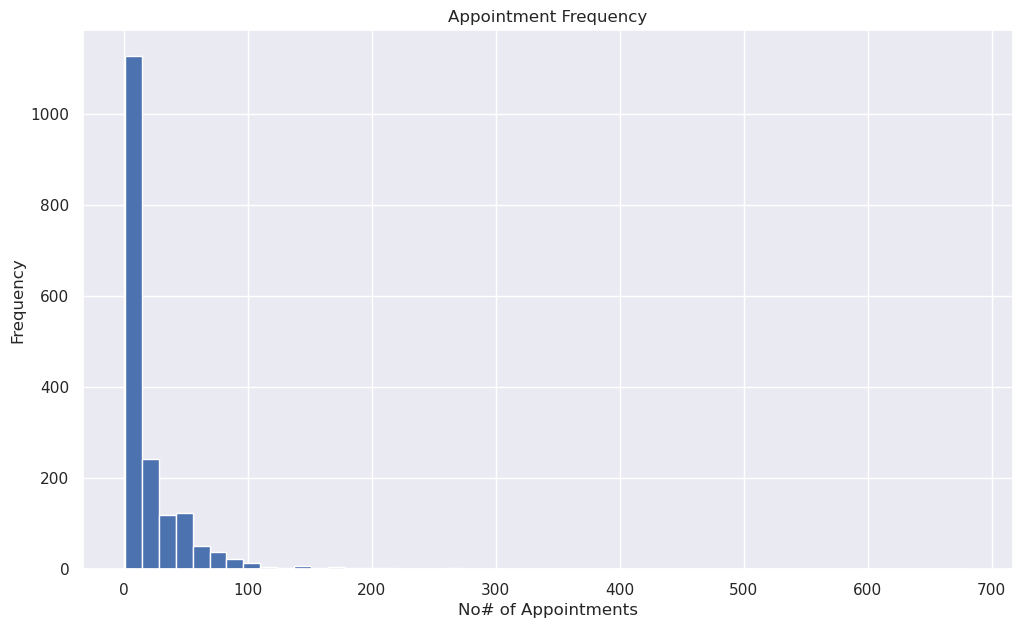

In [13]:
# seen_df[seen_df["Patient FID"]].groupby("Patient FID").count()
appointment_frequency = seen_df["Patient FID"].value_counts().values

# Plot on a histogram 
%matplotlib inline
sns.set()

plt.figure(figsize=(12, 7))
plt.hist(appointment_frequency, bins=50)
plt.title("Appointment Frequency")
plt.xlabel("No# of Appointments")
plt.ylabel("Frequency")

**How many amongst the seen was their first appointment?**

In [14]:
seen_df["FirstTreatmentApptInd"].unique()

array(['N', 'Y', nan], dtype=object)

<Axes: ylabel='count'>

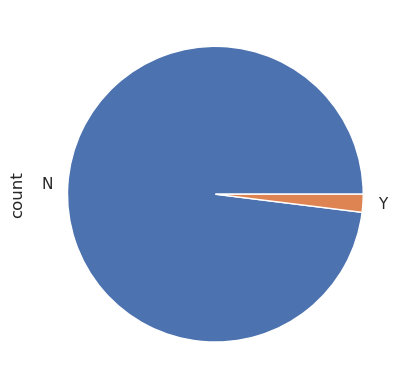

In [15]:
# Plot the data  
seen_df["FirstTreatmentApptInd"].value_counts().plot(kind="pie")

Most of them it was not their first time to visit the health center. Lets find out among the first timers if they had an intake

In [16]:
first_timer_df = seen_df[seen_df["FirstTreatmentApptInd"]=="Y"].reset_index(drop=True)

# Who had an intake? 
first_timer_df["Appt Type Group"].value_counts()

Appt Type Group
MH Infusion        395
TMS                330
KAP Integration     49
Intake               3
Name: count, dtype: int64

**A funnel Chart that will narrow down the number of appointments at each stage**

In [17]:
import plotly.express as px

In [18]:
# Count the total appointments
total_appointments = appointment_df.shape[0]

# Count successful appointments 
successful_appnts = appointment_df[appointment_df["Appt Status Description"]=="Seen"].shape[0]

# Count First time visitors therein
first_time_visitors = seen_df[seen_df["FirstTreatmentApptInd"]=="Y"].shape[0]

# First time visitors with intake 
intakes = first_timer_df[first_timer_df["Appt Type Group"]=="Intake"].shape[0]

# Prepare the funnel
## funnel data 
funnel_data = {
    "Stage":["Total Appointments",
            "Successfull Appointments", 
            "First-time Visitors",
            "Intakes"],
    "Count":[total_appointments,
            successful_appnts,
            first_time_visitors,
            intakes]
}

funnel_df = pd.DataFrame(funnel_data)
funnel_df

,Stage,Count
0,Total Appointments,55975
1,Successfull Appointments,40985
2,First-time Visitors,777
3,Intakes,3


In [19]:
# fig = px.funnel(funnel_df, x = "Count", 
#                y="Stage", title = "Appointment Funnel Analysis")
# fig.show()